# Function Approximation with a Linear Model
$y=f(x)=\sin x$ <br />
Approximate this function with a linear function of the form <br />
$y = w_0 + w_1 x + w_2 x^2$ <br />
in the range $x\in(0,2\pi)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generate data

In [2]:
def fx(x):
    '''
    Input:
        x: float (scalar) or np array
    Output:
        y: float (scalar) or np array; y=f(x)=sin(x)
        
    HINT: Use web search on how to take sine in numpy
    '''
    
    y = np.sin(x)
    
    return y

In [3]:
'''Testing'''
def test_fx():
    assert fx(0)==0
    assert np.isclose(fx(np.pi/2), 1, atol=0.001)
    assert np.isclose(fx(np.pi/4), 0.707, atol=0.001)
    print('Test passed', '\U0001F44D')
test_fx()

Test passed 👍


In [4]:
def generateX_fx(N):
    '''
    Generate N random points in the range (0, 2pi)
    Input:
        N: int
    Outputs:
        x: np vector of shape (N,)
        y: np vector of shape (N,); y=f(x)
    '''
   
    x = np.random.random(N)*2*np.pi
    yd = fx(x)

    return x, yd

In [5]:
'''Testing'''
def test_generateX_fx():
    x, yd = generateX_fx(20)
    assert x.shape[0]==20
    assert yd.shape[0]==20
    print('Test passed', '\U0001F44D')
test_generateX_fx()

Test passed 👍


### Plotting

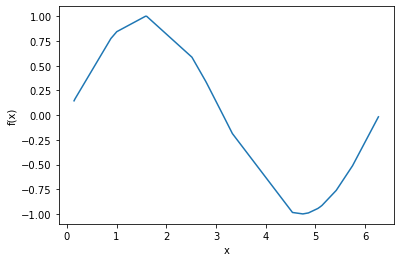

In [6]:
def plotdata():
    x, yd = generateX_fx(20)
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.plot(x[i],yd[i])
    plt.ylabel('f(x)')
    plt.xlabel('x')
plotdata()

## Training
We will now define a linear model to estimate the above function, and train it with all the data

### Define model
$y = \sum_{d=0}^D w_d x^d$, here, $D$ is the degree of the model, say D=2 <br />

In matrix representation: y = Aw <br/>

In [7]:
def createA(x, D):
    '''
    Create the matrix A with degree D
    Input:
        x: np vector of shape (N,)
        D: degree of the model
    Output:
        A: np matrix of shape (N,D+1)
    '''

    N = x.shape[0]
    A = np.ones((N,D+1))
    for d in range(1,D+1): 
        A[:,d] = np.power(x,d)
    return A

In [8]:
'''Testing'''
def test_createA():
    x = np.array([1,2,3])
    A = createA(x, 2)
    assert A.shape==(3,3)
    assert np.all(A[0,:]==1)
    assert np.all(A==np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]]))
    print('Test passed', '\U0001F44D')
test_createA()

Test passed 👍


### Estimate Weights
Estimate w from yd and A. Use the least square solution you learnt in the video

In [9]:
def train_w(A, yd):
    '''
    Inputs:
        A: np matrix of shape (N,D+1)
        yd: np vector of shape (N,)
    Output:
        w: np vector of shape (D+1,)
    '''
    N = yd.shape[0]
    D = A.shape[1]-1
    if N>D+1:
      w = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(yd)  
    elif N<=D+1:
      w = A.T.dot(np.linalg.inv(A.dot(A.T))).dot(yd)  
    return w

In [10]:
'''Testing'''
def test_train_w():
    A = np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]])
    yd = np.array([1,2,3])
    assert np.all(np.isclose(train_w(A, yd), np.array([0,1,0]), atol=.001))
    yd = yd*yd
    assert np.all(np.isclose(train_w(A, yd), np.array([0,0,1]), atol=.001))
    print('Test passed', '\U0001F44D')
test_train_w()

Test passed 👍


### Estimate y from the model, given x

In [11]:
def predict_y(w, x):
    '''
    Inputs:
        w: np vector of shape (D+1,)
        x: np vector of shape (N,)
    Outputs:
        y: np vector of shape (N,); y=Aw
    '''
    D = w.shape[0]-1
    A = createA(x, D)
    y = A.dot(w)
    return y

In [12]:
def test_predict_y():
    w = np.array([1,2,3])
    x = np.array([0.2,0.5,0.6])
    y = predict_y(w, x)
    assert np.all(np.isclose(y, np.array([1.52, 2.75, 3.28]), atol=0.001))
    print('Test passed', '\U0001F44D')
test_predict_y()

Test passed 👍


### Estimate Error
Find E as the mean squared error

In [13]:
def compute_mse(y, yd):
    '''
    Inputs:
        y: np vector of shape (N,); y=Aw
        yd: np vector of shape (N,); yd=f(x), ie., desired or true value
    Output:
        mse: mean squared error
    '''
    mse = (y-yd).dot(y-yd)/y.shape[0]
    return mse

In [14]:
'''Testing'''
def test_compute_mse():
    yd = np.array([1,0,1,0])
    y = np.array([.8,.2,.8,.2])
    assert np.isclose(compute_mse(y, yd), 0.04, atol=0.003)
    print('Test passed', '\U0001F44D')
test_compute_mse()

Test passed 👍


### Plotting


In [15]:
def plotModel(x, y, yd, title='',xlim=[0,7]):
    i = x.argsort()
    plt.figure()
    plt.plot(x[i],y[i],'g-o')
    plt.plot(x[i],yd[i],'r-o')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend(['estimated', 'true'])
    plt.xlim(xlim)
    plt.title(title)

# EXPERIMENTS
## Could you train it?
Using the above functions:
- Generate 20 training points
- Train your linear model using x and yd
- Predict y (using the linear model you found above) for the training data x
- Compare y with yd to find the mean-squared error 

In [16]:
def trainModel(N, D):
    '''
    Inputs:
        N: number of samples
        D: degree of the model
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        w: np array of size (D+1,)
        mse: scalar float
    '''
    x, yd = generateX_fx(N)
    A = createA(x, D)
    w = train_w(A, yd)
    y = predict_y(w, x)
    mse = compute_mse(y, yd)
    return x, y, yd, w, mse

In [17]:
'''testing'''
def test_trainModel():
    N = 20
    D = 2
    x, y, yd, w, mse = trainModel(N,D)
    assert x.shape[0]==20
    assert w.shape[0]==D+1
    print('final weights are:', w)
    print('MSE on train data = ', mse)
    print('Test passed', '\U0001F44D')
test_trainModel()

final weights are: [ 0.85649484 -0.33062986  0.01495137]
MSE on train data =  0.2176936414835136
Test passed 👍


## Could you test it on new (test) points?
Using the above functions:
- Generate 30 test points
- Estimate y using the linear model w you found above. Do NOT train again
- Compare y with yd to find the mean-squared error <br />

In [18]:
def testModel(Ntest, w):
    '''
    Inputs:
        Ntest: number of test samples to be generated
        w: np array of size (D+1,)
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        mse: scalar float
    '''
    x, yd = generateX_fx(Ntest)
    D = w.shape[0]-1
    A = createA(x, D)
    print(A.shape)
    y = predict_y(w, x)
    mse = compute_mse(y, yd)
    return x, y, yd, mse

[-1.74697247e-02  1.00823833e+00 -1.18846052e-04 -1.70153284e-01
  4.29946339e-03  5.38548198e-03  1.25969471e-03 -5.37987992e-04
  5.49992859e-05 -1.62355011e-06 -1.96395429e-08]
MSE on train data =  5.440031128139533e-05
(50, 11)
MSE on test data =  2.4017533870842876e-05
Test passed 👍


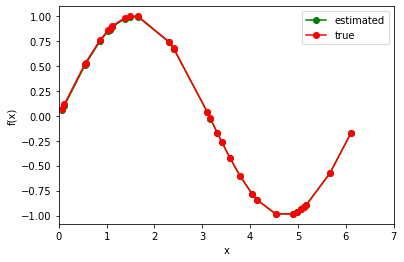

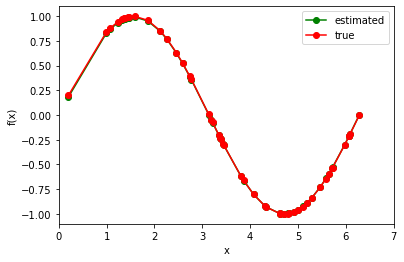

In [19]:
'''Testing'''
def test_testModel():
    N = 30
    D = 10
    x, y, yd, w, mse = trainModel(N,D)
    assert x.shape[0]==N
    assert w.shape[0]==D+1
    print(w)
    print('MSE on train data = ', mse)
    plotModel(x,y,yd)
    Ntest = 50
    x, y, yd, mse = testModel(Ntest,w)
    print('MSE on test data = ', mse)
    plotModel(x,y,yd)
    print('Test passed', '\U0001F44D')
test_testModel()

# ADVANCED

## Does the performance improve with increasing the number of training points?
- Repeat the training with different no. of samples. Take N=3, 5, 10, 30; and D=5
- Plot training error vs N
- Plot test error vs N

N=3; D=5
MSE on train data =  3.733063717753145e-23
(50, 6)
MSE on test data =  0.6254936854703921
N=5; D=5
MSE on train data =  1.5608634735425056e-16
(50, 6)
MSE on test data =  0.0002669998502535154
N=10; D=5
MSE on train data =  3.3840297853925264e-08
(50, 6)
MSE on test data =  0.00020138937782458003
N=30; D=5
MSE on train data =  1.4213548030762009e-05
(50, 6)
MSE on test data =  2.224954082146545e-05


Text(0, 0.5, 'MSE')

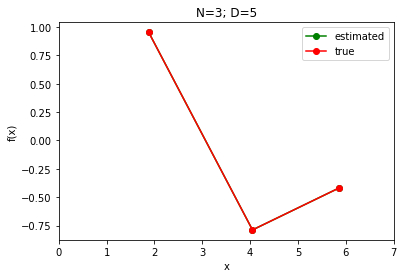

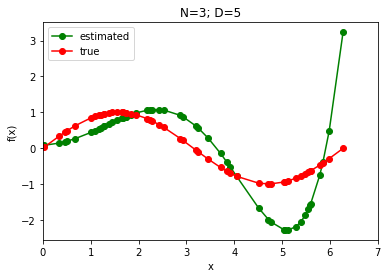

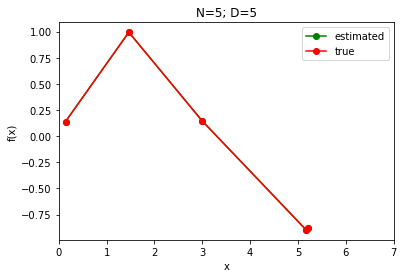

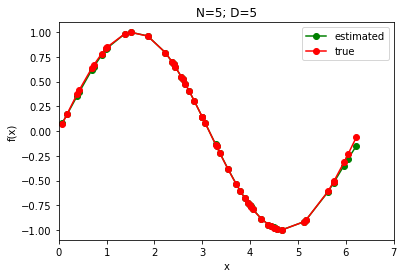

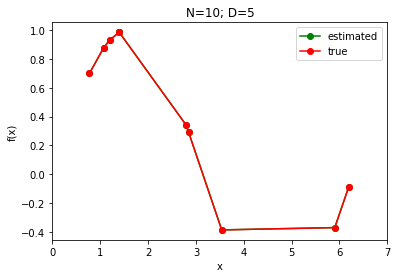

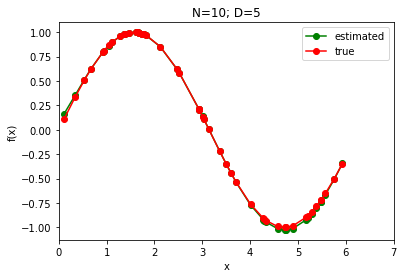

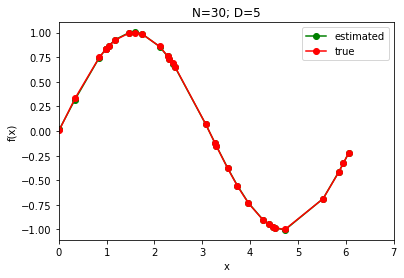

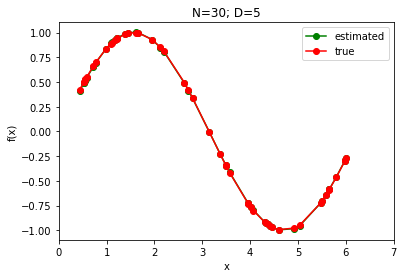

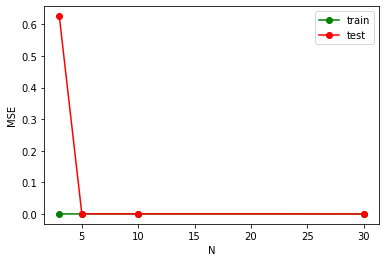

In [20]:
D = 5
MSE_train = []
MSE_test = []
N_all = [3,5,10,30]
for N in N_all:
  title = "N=%d; D=%d"%(N,D)
  print(title)
  x, y, yd, w, mse = trainModel(N,D)
  MSE_train.append(mse)
  print('MSE on train data = ', mse)
  plotModel(x,y,yd,title)
  Ntest = 50
  x, y, yd, mse = testModel(Ntest,w)
  MSE_test.append(mse)
  print('MSE on test data = ', mse)
  plotModel(x,y,yd,title)
plt.figure()
plt.plot(N_all, MSE_train,'go-')
plt.plot(N_all, MSE_test, 'ro-')
plt.legend(['train','test'])
plt.xlabel('N')
plt.ylabel('MSE')

## Does the performance improve with increasing the degree D of the model?
- Repeat the training with different degree models. Take D=0, 1, 2, 4, 7, 12, and N=10
- Plot training error vs D
- Plot test error vs D
- Plot y vs x for each D

N=5; D=0
MSE on train data =  0.2572446878008472
(50, 1)
MSE on test data =  0.7061495835088911
N=5; D=1
MSE on train data =  0.22577267797092232
(50, 2)
MSE on test data =  0.36187640416249073
N=5; D=2
MSE on train data =  0.0016262493707104226
(50, 3)
MSE on test data =  1.2456031569003767
N=5; D=4
MSE on train data =  2.856134779903702e-10
(50, 5)
MSE on test data =  0.7051093366319279
N=5; D=7
MSE on train data =  2.564757456369391e-18
(50, 8)
MSE on test data =  15.291462570304445
N=5; D=12
MSE on train data =  1.89555652559948e-11
(50, 13)
MSE on test data =  646381710.2877094


Text(0, 0.5, 'MSE')

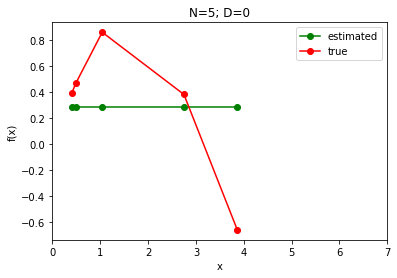

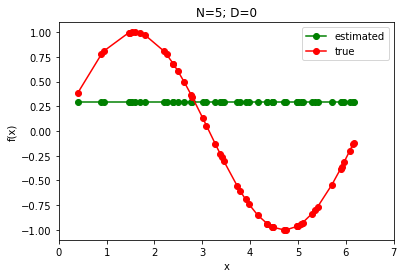

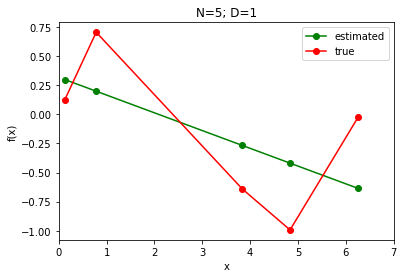

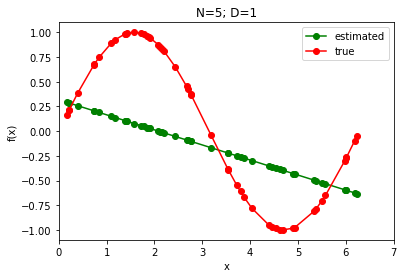

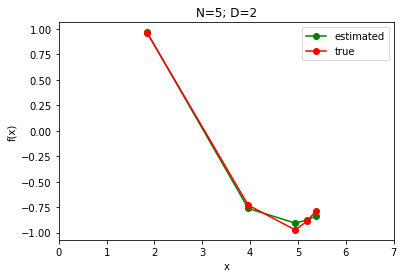

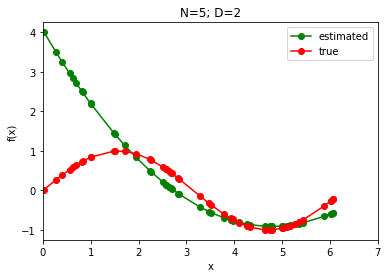

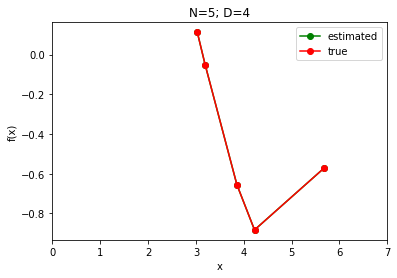

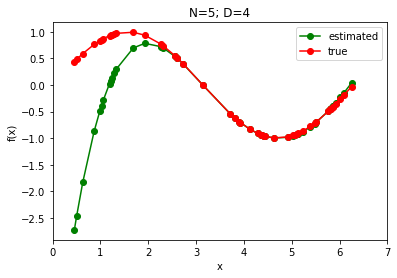

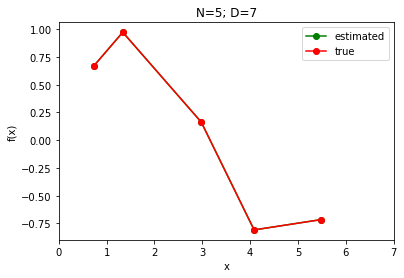

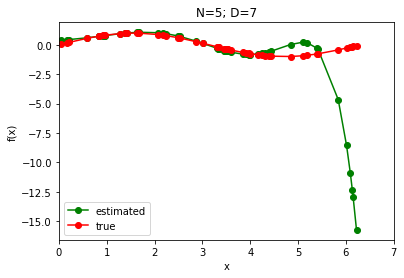

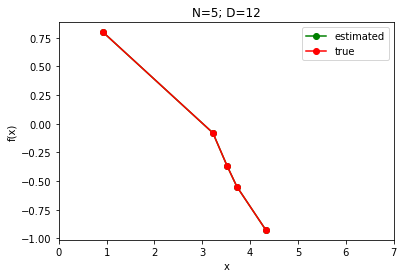

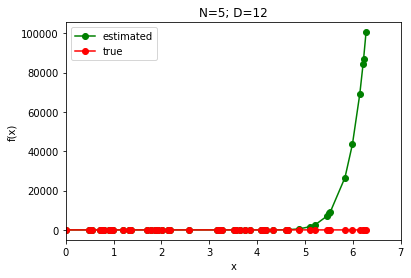

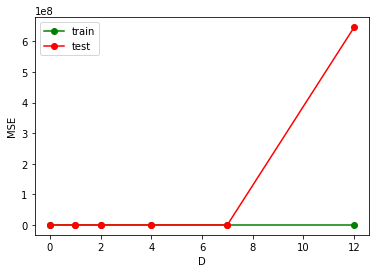

In [21]:
N=5
MSE_train = []
MSE_test = []
D_all = [0,1,2,4,7,12]
for D in D_all:
  title = "N=%d; D=%d"%(N,D)
  print(title)
  x, y, yd, w, mse = trainModel(N,D)
  MSE_train.append(mse)
  print('MSE on train data = ', mse)
  plotModel(x,y,yd,title)
  Ntest = 50
  x, y, yd, mse = testModel(Ntest,w)
  MSE_test.append(mse)
  print('MSE on test data = ', mse)
  plotModel(x,y,yd,title)
plt.figure()
plt.plot(D_all, MSE_train,'go-')
plt.plot(D_all, MSE_test, 'ro-')
plt.legend(['train','test'])
plt.xlabel('D')
plt.ylabel('MSE')